## Regresión lineal simple en Python
### El paquete statsmodel para regresión lineal

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\Usuario\\Documents\\GitHub\\python-ml-course\\NOTEBOOKS-CHRIS'

In [4]:
data = pd.read_csv("../datasets/ads/Advertising.csv")

In [5]:
data.head() #Dataset con información en gasto de publicidad en tele, radio,
# y periodico

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [6]:
import statsmodels.formula.api as smf

In [7]:
lm = smf.ols(formula="Sales~TV", data=data).fit() 
# ols() sirve para crear el modelo lineal
# parametro "formula"="Variable a Predecir~Variable Predictoria"
# .fit() es para crear el modelo ajustandose a esas condiciones 

In [8]:
lm.params # .params es para ver los parametros 

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal predictivo seria
Sales = 7.032594 + 0.047537 * TV

In [9]:
lm.pvalues #p-valor < significancia(0.05)
#los p valores son mucho menores que 0.05

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [10]:
lm.rsquared #R2

0.611875050850071

In [11]:
lm.rsquared_adj #R2 ajustado es un mas preciso

0.6099148238341623

In [12]:
lm.summary() #Criterio AIC y BIC son muy importantes ... cuantos mas grandes mejor
#AIC (Aikaique) y BIC (Bayesiano)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 24 Jan 2023   Prob (F-statistic):           1.47e-42
Time:                        10:40:26   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#Con el modelo hallado realizaremos la predicción de ventas.
sales_pred = lm.predict(pd.DataFrame(data["TV"]))
#lm.predict("parametro de entrada en formato DataFrame")

In [14]:
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

In [15]:
import matplotlib.pyplot as plt #Graficando la predicción

In [16]:
%matplotlib inline

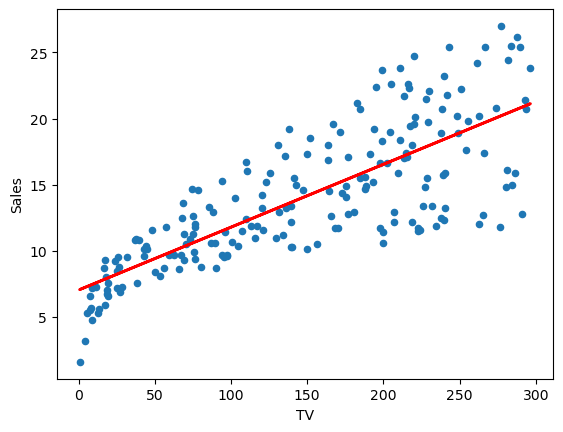

In [17]:
data.plot(kind="scatter", x="TV", y="Sales")
plt.plot(pd.DataFrame(data["TV"]), sales_pred, c="red", linewidth=2)

In [18]:
data["Sales_pred"] = 7.032594 + 0.047537*data["TV"] #Añadiendo las predicciones
#al Dataset como columna

In [19]:
data["RSE"] = (data["Sales"] - data["Sales_pred"])**2

In [20]:
SSD = sum(data["RSE"]) #Suma de los cuadrados de la diferencia

In [21]:
SSD

2102.5305838896525

In [22]:
RSE = np.sqrt(SSD/(len(data)-2)) #Desviacion tipica residual del error

In [23]:
RSE #Desviacion tipica residual del error

3.258656369238098

In [24]:
sales_m = np.mean(data["Sales"]) #Numero de ventas promedios

In [25]:
sales_m #Numero de ventas promedios

14.022500000000003

In [26]:
error = RSE / sales_m  # Porcentaje de error ()

In [27]:
error*100 # Ratio de error (En este caso el 23% de los datos no puede ser 
# explicados por el modelo)

23.23876890168014

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <BarContainer object of 10 artists>)

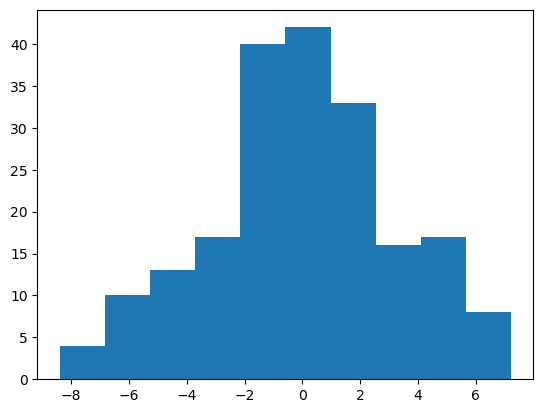

In [28]:
plt.hist(data["Sales"] - data["Sales_pred"])

## Regresión lineal múltiple en Python
### El paquete statsmodel para regresión múltiple
* Sales~TV
* Sales~Newspaper
* Sales~Radio
* Sales~TV+Newspaper
* Sales~TV+Radio
* Sales~Newspaper+Radio
* Sales~TV+Newspaper+Radio

#### Hay dos tecnicas, el enfoque constructivo y el enfoque destructivo

In [70]:
#Añadir el Newspaper al modelo existente
lm2 = smf.ols(formula="Sales~TV+Newspaper", data=data).fit()

In [71]:
lm2.params #Con esto se observamos los valores alpha y beta1, beta2, .... etc

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [72]:
lm2.pvalues #COn esto observamos los p-valores los cuales deben ser menor a 0.05

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

Sales = 5.774948 + 0.046901 * TV + 0.044219 * Newspaper

In [73]:
lm2.rsquared  #R2

0.6458354938293271

In [74]:
lm2.rsquared_adj #R2 ajustado

0.6422399150864777

In [75]:
sales_pred2 = lm2.predict(data[["TV", "Newspaper"]]) #Recordar colocar las columnas
# dentro de otro cochete

In [76]:
sales_pred2

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [77]:
data["RSE2"] = (data["Sales"]-sales_pred2)**2

In [78]:
SSD2 = sum(data["RSE2"])
SSD2

1918.5618118968273

In [79]:
RSE2 = np.sqrt(SSD2/(len(data)-2-1)) # Son 2 variables predictoras 
RSE2

3.120719860252885

In [81]:
error2 = RSE2/np.mean(data["Sales"])
error2*100

22.255089037282115

In [82]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Tue, 24 Jan 2023   Prob (F-statistic):           3.95e-45
Time:                        21:17:49   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
#Añadir el Newspaper al modelo existente
lm3 = smf.ols(formula="Sales~TV+Radio", data=data).fit()

In [84]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 24 Jan 2023   Prob (F-statistic):           4.83e-98
Time:                        21:18:41   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
sales_pred3 = lm3.predict(data[["TV", "Radio"]]) 

In [86]:
sales_pred3

0      20.555465
1      12.345362
2      12.337018
3      17.617116
4      13.223908
         ...    
195     5.364512
196     8.152375
197    12.768048
198    23.792923
199    15.157543
Length: 200, dtype: float64

In [87]:
data["RSE3"] = (data["Sales"]-sales_pred3)**2

In [88]:
SSD3 = sum(data["RSE3"])
SSD3

556.9139800676184

In [89]:
RSE3 = np.sqrt(SSD3/(len(data)-2-1))
RSE3

1.681360912508001

In [99]:
error3 = RSE3/np.mean(data["Sales"])
error3*100

11.990450436855058

In [100]:
#Añadiremos todas las varibles
lm4 = smf.ols(formula="Sales~TV+Radio+Newspaper", data=data).fit()

In [101]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 24 Jan 2023   Prob (F-statistic):           1.58e-96
Time:                        21:39:57   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
sales_pred4 = lm3.predict(data[["TV", "Radio", "Newspaper"]]) 

In [103]:
sales_pred4

0      20.555465
1      12.345362
2      12.337018
3      17.617116
4      13.223908
         ...    
195     5.364512
196     8.152375
197    12.768048
198    23.792923
199    15.157543
Length: 200, dtype: float64

In [104]:
data["RSE4"] = (data["Sales"]-sales_pred4)**2
SSD4 = sum(data["RSE4"])
SSD4

556.9139800676184

In [105]:
RSE4 = np.sqrt(SSD4/(len(data)-3-1))
RSE4

1.6856446415208186

In [106]:
error4 = RSE4/np.mean(data["Sales"])
error4*100

12.0209994046769

## Multicolinealidad

La multicolinealidad alude a la correlacion entre las variables predictoras

In [107]:
data1 = pd.read_csv("../datasets/ads/Advertising.csv")

In [108]:
data1.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [109]:
data1.corr() #Esta matriz es bueno para observar cuales son los pares de varibles predictores
#que guardan una correlacion 

TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000

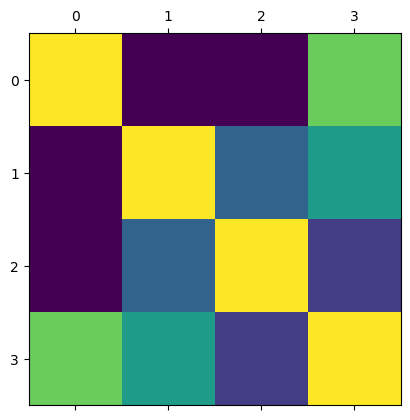

In [110]:
plt.matshow(data1.corr())

## Factor de Inflación de la Varianza
Este factor sirve para ver el nivel de correlación de las variables predictoras
* VIF = 1 : Las variables no estan correlacionadas 
* VIF < 5 : Las variables tienen una correlacion moderada y se pueden quedar en el modelo.
* VIF > 5 : Las variables están altamente correlacionadas y deben desaparecer del modelo.

In [111]:
#Newspaper~TV+Radio  -> R2  VIF = 1/(1-R^2)
lm_n = smf.ols(formula="Newspaper~TV+Radio", data=data).fit()

In [112]:
rsquared_n = lm_n.rsquared
rsquared_n

0.12678045656223502

In [113]:
VIF_n = 1/(1-(rsquared_n)**2)
VIF_n

1.0163358550057326

In [114]:
#TV~Newspaper+Radio  -> R2  VIF = 1/(1-R^2)
lm_tv = smf.ols(formula="TV~Newspaper+Radio", data=data).fit()

In [115]:
rsquared_tv = lm_tv.rsquared
rsquared_tv

0.00458962317423961

In [116]:
VIF_tv = 1/(1-(rsquared_tv)**2)
VIF_tv

1.00002106508461

In [117]:
#Radio~TV+Newspaper  -> R2  VIF = 1/(1-R^2)
lm_ra = smf.ols(formula="Radio~Newspaper+TV", data=data).fit()

In [118]:
rsquared_ra = lm_ra.rsquared
rsquared_ra

0.1266008772420567

In [119]:
VIF_ra = 1/(1-(rsquared_ra)**2)
VIF_ra

1.0162888563591415

In [69]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 24 Jan 2023   Prob (F-statistic):           4.83e-98
Time:                        10:40:32   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""